# Résolution d'équations différentielles en temps

## Notions d'EDO *

De nombreux problèmes de la mécanique, et notamment la formulation des lois de comportement, peuvent se mettre sous la forme d'une équation différentielle d'ordre 1 en temps : on parle d'**équation différentielle ordinaire** (**EDO**).  On les oppose généralement aux **équations aux dérivées partielles** (**EDP**) dans lesquelles on traite de fonctions à plusieurs variables et pour lesquelles on utilisera la méthode des **éléments finis**, **différences finies**,...

Dans le cadre d'une EDO, on relie une quantité inconnue $\mathbf y \in \mathbb R^n$ à sa dérivée temporelle $\mathbf y' =\frac{d\mathbf y}{dt}$ et au temps $t$. Le problème s'écrit généralement sous la forme suivante :
$$
\mathbf y' = 
f(\mathbf y, t)
.
$$
On associe au problème une **condition initiale** $\mathbf y_0$ qui décrit l'état du système à l'instant initial $t_0$ : 
$$
\mathbf y(t_0) = 
\mathbf y_0.
$$
Le problème ainsi posé admet une solution **unique** (problème de Cauchy).

Par exemple, on peut considérer l'équation scalaire suivante : 
$$
\dot y = -\alpha y
$$
$$
\text{avec} \quad
y(t=0) = 1 \quad (\alpha >0).
$$
Ce problème admet la solution unique qui nous servira de référence dans ce chapitre : 
$$
y(t) = e^{-\alpha t}
$$
Néanmoins, il est très souvent impossible de calculer la solution d'un problème de ce type "à la main". 
On met alors en place dans schémas numériques pour approcher la solution. Généralement, on dit qu'on **intègre** l'équation différentielle, ce qui sera justifié un peu plus tard.

## Schéma d'Euler explicite *

L'idée est alors de découper le problème initial en des problèmes plus petits, définis sur des petits intervalles de temps $\Delta t_i = t_{i+1} - t_i$. On peut alors approcher la dérivée par :
$$
\mathbf y'(t_i) \approx
\frac{\mathbf y (t_{i+1}) - \mathbf y(t_i)}{\Delta t_i}
$$

Il est important de noter qu'à chaque incrément, on n'aura pas la valeur exacte $\mathbf y(t_i)$ mais une approximation notée $\mathbf y_i$.

On s'intéresse maintenant au membre de droite $f(\mathbf y, t)$. Un premier choix est d'évaluer la fonction $f$ en $t_i$, ce qui revient à approximer la dérivée par sa valeur au début de l'incrément. On a alors :
$$
\frac{\mathbf y_{i+1} - \mathbf y_i}{\Delta t_i}
= 
f(\mathbf y_i, t_i).
$$
Le problème peut se mettre sous la formule récurrente suivante : 
$$
\mathbf y_{i+1}
=
\mathbf y_{i} +\Delta t_i f(\mathbf y_i, t_i).
$$
On voit que le relation est explicite : on déduit chaque incrément directement à partir du précédent. Cette relation de récurrence définie le schéma d'**Euler explicite**.

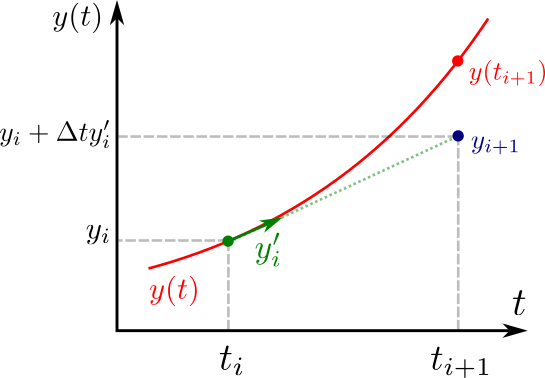

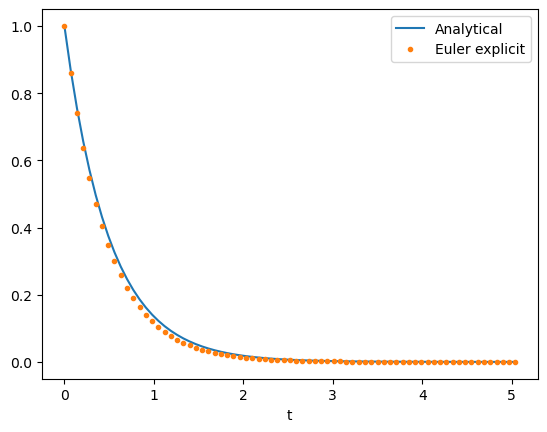

In [23]:
import numpy as np 
import matplotlib.pyplot as plt

alpha = 2.
f = lambda x : -alpha*x 

tf = 5
Delta_t = 0.07

time = np.arange(0., tf, Delta_t)

y0 = 1

y_list = list()
time_list = list()

y_list.append(y0)
time_list.append(0)

for i in time:
    yn = y_list[-1]
    tn = time_list[-1]
    
    y_np1 = yn + Delta_t*f(yn)
    t_np1 = tn + Delta_t
    
    time_list.append(t_np1)
    y_list.append(y_np1)
    
time_list = np.array(time_list)
y_list = np.array(y_list)

plt.plot(time_list, np.exp(-alpha*time_list), label="Analytical")
plt.plot(time_list, y_list,"o", ms=3.0, label="Euler explicit")
plt.xlabel("t")

plt.legend()

## Schéma d'Euler implicite *

Un autre choix consiste à approximer la dérivée par sa valeur en fin d'incrément : 
$$
\frac{\mathbf y_{i+1} - \mathbf y_i}{\Delta t_i}
= 
f(\mathbf y_{i+1}, t_{i+1}).
$$
Cette fois on ne peut plus isoler simplement la grandeur $\mathbf y_{i+1}$. On parle de schéma d'**Euler implicite**. Considérant ce problème non-linéaire, une stratégie consiste alors à former le résidu $\mathbf r_{i+1}$ et à chercher son zéro via un schéma de **Newton-Raphson** :
$$
\mathbf r_{i+1}
= 
\mathbf y_{i+1}
-
\mathbf y_{i}
- 
\Delta t_i f(\mathbf y_{i+1}, t_{i+1}).
$$
 Le schéma itératif de Newton-Raphson s'écrira pour l'itération $j+1$ : 
$$
\mathbf y_{i+1}^{j+1} = 
\mathbf y_{i+1}^j
- 
\left [
\mathbf J_{\mathbf r_{i+1}}^{j} \right]^{-1}
\cdot \mathbf r^j_{i+1}
$$
avec $\mathbf J_{\mathbf r_{i+1}}$ la matrice jacobienne associée au résidu : 
$$
\mathbf J_{\mathbf r}^j =
\left .
\frac{\partial \mathbf r_{i+1}}{\partial \mathbf y}
\right )_{\mathbf y = \mathbf y_{i+1}^j}.
$$

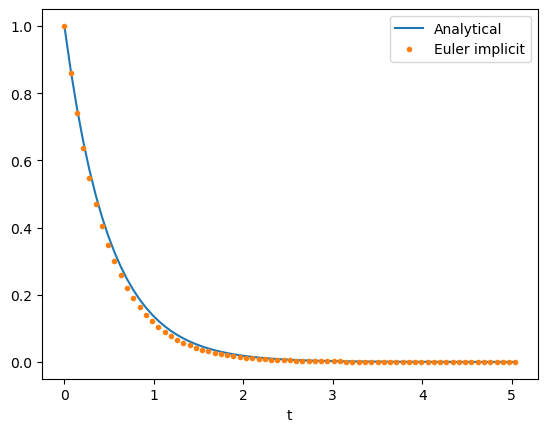

In [21]:
import numpy as np 
import matplotlib.pyplot as plt

f = lambda y : -alpha*y 
dfdy = lambda t : -alpha

r = lambda y : y - yn - Delta_t*f(yn) 
drdy = lambda y : 1. - Delta_t*dfdy(yn)

def newton_raphson(yn_j):
    resi = 1.0e10
    while resi > 1.0e-6 :
        yn_j -= r(yn_j)/drdy(yn_j)
        resi = r(yn_j)
    return yn_j
        
alpha = 2.
tf = 5
Delta_t = 0.07

time = np.arange(0., tf, Delta_t)

y0 = 1

y_list = list()
time_list = list()

y_list.append(y0)
time_list.append(0)

for i in time:
    yn = y_list[-1]
    tn = time_list[-1]
    
    y_np1 = newton_raphson(yn)
    t_np1 = tn + Delta_t
    
    time_list.append(t_np1)
    y_list.append(y_np1)
    
time_list = np.array(time_list)
y_list = np.array(y_list)

plt.plot(time_list, np.exp(-alpha*time_list), label="Analytical")
plt.plot(time_list, y_list, "o", ms = 3.0, label="Euler implicit")
plt.xlabel("t")

plt.legend()

## Implicite vs. explicite **

On étudie ici les schémas d'Euler implicite et explicite à partir de l'exemple introductif d'EDO : 
$$
\dot y = -\alpha y
$$
avec $y(t = 0) = 1$ et $\alpha > 0$.
En prenant un pas constant $\Delta t_i = \Delta t$, le schéma d'Euler explicite s'écrit :
$$
\frac{ y_{i+1} -  y_i}{\Delta t}
= 
-\alpha y_i,
$$
qu'on peut réécrire :
$$
y_{i+1} = (1 - \alpha \Delta t)y_i.
$$
On reconnaît une suite géométrique qui peut s'écrire : 
$$
y_i = 
(1 - \alpha \Delta t)^i.
$$
Cette suite est convergente à condition que : 
$$
|1 - \alpha \Delta t| < 1
$$


Le schéma d'Euler implicite s'écrit : 
$$
\frac{ y_{i+1} -  y_i}{\Delta t}
= 
-\alpha y_{i+1}.
$$
Dans cet exemple précis, on peut réaliser l'inversion du problème "à la main" et écrire : 
$$
y_{i+1}
=
\frac{1}{1 + \alpha \Delta t}
y_{i}.
$$
On reconnaît à nouveau une suite géométrique : 
$$
y_i
=
\left(
\frac{1}{1 + \alpha \Delta t}
\right )^i
$$
Puisque $\alpha \Delta t > 0$, la suite est convergente de façon inconditionnelle.

On voit ici que la méthode explicite est stable sous condition, contrairement à la méthode implicite qui est inconditionnellement stable. Ce résultat se généralise. 

Les **méthodes implicites** sont **inconditionnellement stables**. Cependant, elle nécessite une étape d'inversion pouvant être lourde, et qui est généralement réalisée par un processus itératif (Newton-Raphson). Elle seront privilégiées pour les problèmes linéaire et "faiblement" non-linéaire, ainsi que pour les problèmes statiques ou faiblement dynamique.

Les **méthodes explicites** sont **stables sous condition**, imposant une restriction sur le pas de temps. On appelle généralement cette condition la condition de **Courant–Friedrichs–Lewy** (ou **condition CFL**). Elles sont généralement plus simples d'implémentation et **plus rapide**, dû à l'absence d'étape d'inversion. Elles seront utilisées surtout pour les problèmes fortement non-linéaires (fissuration, endommagement,...) et (fortement) dynamique.

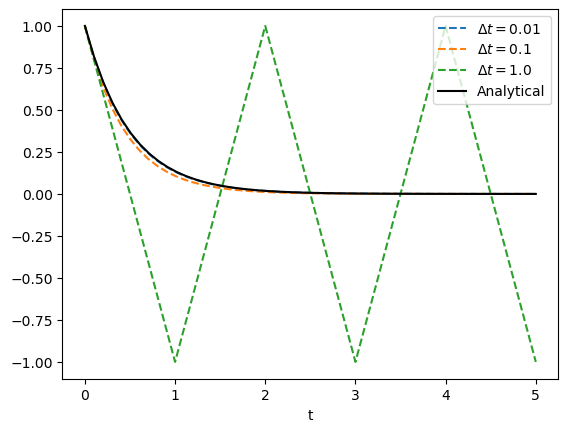

In [20]:
import numpy as np 
import matplotlib.pyplot as plt

alpha = 2.
f = lambda x : -alpha*x 

tf = 5
Delta_t_list = [0.01, 0.1, 1.0]

for Delta_t in Delta_t_list :

    time = np.arange(0., tf, Delta_t)

    y0 = 1

    y_list = list()
    time_list = list()

    y_list.append(y0)
    time_list.append(0)

    for i in time:
        yn = y_list[-1]
        tn = time_list[-1]

        y_np1 = yn + Delta_t*f(yn)
        t_np1 = tn + Delta_t

        time_list.append(t_np1)
        y_list.append(y_np1)

    time_list = np.array(time_list)
    y_list = np.array(y_list)

    plt.plot(time_list, y_list,"--", ms=3.0, label="$\Delta t = $"+str(Delta_t))

t = np.linspace(time_list.min(), time_list.max())
plt.plot(t, np.exp(-alpha*t), "k", label="Analytical")
plt.xlabel("t")
plt.legend()


## $\theta$-méthode **

Les schémas d'Euler peuvent être généralisés assez simplement.
On remarque que les résidus $\mathbf r_{i+1}$ s'écrivent : 
- Euler explicite :
$$
\mathbf r_{i+1}
= 
\mathbf y_{i+1}
-
\mathbf y_{i}
- 
\Delta t_i f(\mathbf y_{i}, t_{i}).
$$
- Euler implicite :
$$
\mathbf r_{i+1}
= 
\mathbf y_{i+1}
-
\mathbf y_{i}
- 
\Delta t_i f(\mathbf y_{i+1}, t_{i+1}).
$$

Finalement, on peut proposer la formulation suivante qui généralise les deux précédentes : 
$$
\mathbf r_{i+1}
= 
\mathbf y_{i+1}
-
\mathbf y_{i}
- 
\Delta t_i 
\underbrace{
\left [ (1 - \theta) 
f(\mathbf y_{i}, t_{i})
+ 
 \theta
f(\mathbf y_{i+1}, t_{i+1})
\right ]}_{f(\mathbf y_{\theta}, t_{\theta})}
.
$$
On parle de généralement de **$\theta$-méthode**. On note que pour $\theta = 0$, on retrouve la méthode d'Euler explicite et pour $\theta = 1$ la méthode d'Euler implicite. Pour $\theta = 0.5$, on obtient la méthode de **Crank-Nicolson**, stable et plus précise que les schémas d'Euler.

## La même chose en (un peu) plus formel **

On peut réécrire le paragraphe précédent de façon alternative. En considérant l'incrément de $t_i$ à $t_{i+1}$, on intègre l'équation initiale sur l'intervalle considéré :
$$
\int_{t_i}^{t_{i+1}}
\dot{\mathbf y} 
\, dt
= 
\int_{t_i}^{t_{i+1}}
f(\mathbf y, t)
\, dt
$$
Le membre de gauche se calcule directement : 
$$
\int_{t_i}^{t_{i+1}}
\dot{\mathbf y} 
\, dt
=
\mathbf y_{i+1}
-
\mathbf y_i.
$$

La méthode d'évaluation de l'intégrale du membre de droite définit la méthode considérée :
- Euler explicite : méthode des rectangles (inférieure)
$$
\int_{t_i}^{t_{i+1}}
f(\mathbf y, t)
\, dt
=
\Delta t_i f(\mathbf y_i, t_i)
$$
- Euler implicite : méthode des rectangles (supérieure)
$$
\int_{t_i}^{t_{i+1}}
f(\mathbf y, t)
\, dt
=
\Delta t_i f(\mathbf y_{i+1}, t_{i+1})
$$
- Crank-Nicolson : méthode des trapèzes 
$$
\int_{t_i}^{t_{i+1}}
f(\mathbf y, t)
\, dt
=
\Delta t_i \frac{f(\mathbf y_{i}, t_{i})
+
f(\mathbf y_{i+1}, t_{i+1})}{2}
$$

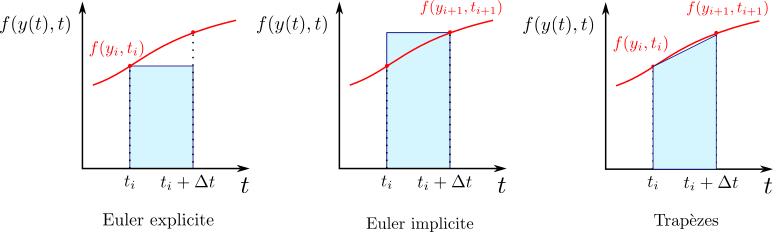

## Erreur de troncature ***

Comme indiqué précédemment les schémas numériques d'intégration nous pousse à approcher la valeur vraie $\mathbf y(t_i)$ par une valeur approchée $ \mathbf y_i$. On commet donc une erreur qui dépend du schéma considéré et qui semble pertinent d'évaluer. 

Une première façon de procéder est d'étudier l'**erreur de troncature locale**. Dans ce cas, on suppose que notre approximation est exacte à l'incrément $i$ ($y(t_i) = y_i$ et $y'(t_i) = y'_i$) et on évalue l'erreur commise pour l'incrément $i+1$. On peut donc la voir comme l'erreur d'un incrément à l'autre. On forme donc $\tau_i$ tel que :
$$
\tau_{i+1} = y(t_{i+1}) - y_{i+1}
$$
Pour une méthode d'Euler explicite, on a : 
$$
\tau_{i+1} = y(t_{i+1}) - (y_{i} + \Delta t f(y_i, t_i)).
$$
On utilise ensuite un développement de Taylor pour simplifier l'expression : 
$$
\tau_{i+1} = y(t_{i})
+ \Delta t y'(t_i)
+\frac{1}{2}\Delta t^2 y''(t_i) + o(\Delta t^2)
- (y_{i} + \Delta t f(y_i, t_i)).
$$
En supposant l'approximation exacte à l'incrément $i$ :
$$
\tau_{i+1} = \frac{1}{2}\Delta t^2 y''(t_i) + o(\Delta t^2)
$$
L'erreur de troncature locale pour le schéma d'Euler explicite est donc en $o(\Delta t^2)$.

L'**erreur de troncature globale** correspond quant à elle à l'erreur cumulée. On ne fait plus l'hypothèse d'une approximation exacte à l'incrément précédent : les erreurs se cumulent à chaque incrément. Cette erreur sera évidemment plus grande que l'erreur de troncature locale. Dans le cas d'une méthode d'Euler, pour atteindre l'incrément $i$, il faudra $\frac{t_i - t_0}{\Delta t}$ pas. Pour chaque incrément, on commet une erreur en $o(\Delta t^2)$ soit une erreur de troncature globale en $o(\Delta t)$.

Les schémas d'Euler sont donc assez peu précis et nécessite de petits pas de temps pour une obtenir une bonne précision. On préférera ainsi des méthodes plus précises, notamment dans le cas explicite avec les méthode de Runge-Kutta.

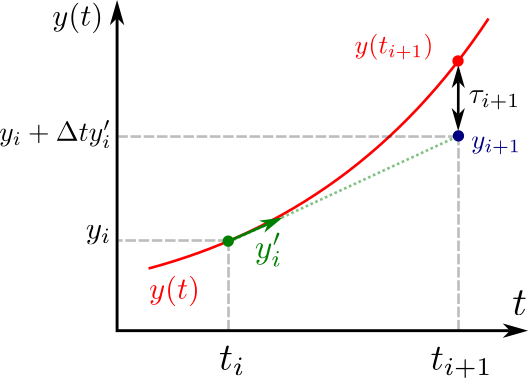

## Méthodes de Runge-Kutta **

Lorsqu'on souhaite réaliser un calcul explicite, on n'utilise en pratique jamais la méthode d'Euler. On lui préféra généralement les **méthodes de Runge-Kutta**, très simples d'implémentation et beaucoup plus précises. Dans les méthodes d'Euler, on calcule la pente $y'$ en début (Euler explicite) ou fin (Euler implicite) d'incrément à partir de la fonction $f$. L'idée est ici d'estimer la pente à partir de points intermédiaires. Typiquement la méthode de Runge-Kutta d'ordre 2 (RK2) estime la pente à partir du point au milieu de l'incrément, d'où le nom de **méthode du point milieu**.


On commence par estimer $y_{i+\frac{1}{2}}$ la valeur de $y$ au milieu de l'incrément. Pour cela on linéarise $y$ sur l'incrément, on estime alors $y_{i+\frac{1}{2}}$ à partir de la pente en début d'incrément : 
$$
y_{i+\frac{1}{2}} =
y_i
+ 
\frac{1}{2}\Delta t
f(t_i, y_i)
$$
La pente en ce point s'écrit : 
$$
y'_{i+\frac{1}{2}} =
f(
t_i +\frac{1}{2}\Delta t,
y_{i+\frac{1}{2}})
$$
On estime ensuite $y_{i+1}$ à partir de cette valeur de pente $y'_{i+\frac{1}{2}}$ :
$$
y_{i+1} = y_i + \Delta t
y'_{i+\frac{1}{2}}.
$$
Cet exemple illustre la démarche des méthodes de Runge-Kutta, aussi appellées méthodes par **prediction-correction**.

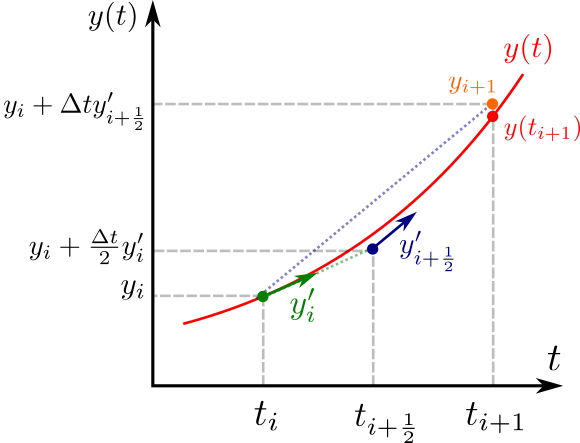

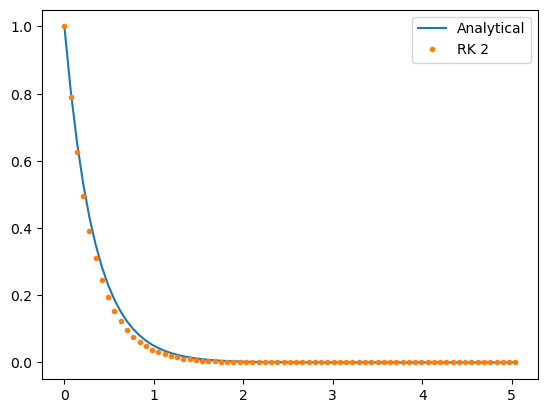

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

alpha = 3.
f = lambda x : -alpha*x 

tf = 5
Delta_t = 0.07

time = np.arange(0., tf, Delta_t)

y0 = 1

y_list = list()
time_list = list()

y_list.append(y0)
time_list.append(0)

for i in time:
    yn = y_list[-1]
    tn = time_list[-1]
    
    k1 = Delta_t*f(yn)
    k2 = Delta_t*f(yn + Delta_t*k1/2.)
        
    y_np1 = yn + k2
    t_np1 = tn + Delta_t
    
    time_list.append(t_np1)
    y_list.append(y_np1)

time_list = np.array(time_list)
y_list = np.array(y_list)

plt.plot(time_list, np.exp(-alpha*time_list), label="Analytical")
plt.plot(time_list, y_list,"o", ms=3.0, label="RK 2")

plt.legend()

La méthode de Runge-Kutta la plus courante est celle d'ordre 4 (**RK4**). Celle-ci est globalement similaire à la méthode précédente, à ceci près qu'au lieu de prendre $y'_{i+\frac{1}{2}}$, on prendra une moyenne pondérée de différentes pentes issues d'estimation successive. La première pente $p_1$ est celle du début d'intervalle :
$$
p_1 = f(y_i, t_i).
$$
On estime ensuite la pente au milieu d'intervalle à partir de $p_1$, ceci correspond à $p_2$ :
$$
p_2 = 
f(y_i +\frac{1}{2}\Delta t p_1, t_i + \frac{1}{2}\Delta t).
$$
Puis une nouvelle estimation de la pente au milieu d'intervalle à partir de $p_2$ pour obtenir $p_3$ :
$$
p_3 = 
f(y_i +\frac{1}{2}\Delta t p_2, t_i + \frac{1}{2}\Delta t).
$$
Enfin, on estime la pente en fin d'intervalle à partir de $p_3$ pour obtenir $p_4$ :
$$
p_4 = f(y_i + \Delta t p_3, t_i + \Delta t).
$$
On contruit une moyenne pondérée de ces pentes $\tilde p$ en donnant plus de poids aux valeurs intermédiaires :
$$
\tilde p
=
\frac{p_1 + 2p_2 + 2p_3 + p_4}{6}.
$$
On estime enfin $y_{i+1}$ à partir de cette pente moyenne : 
$$
y_{i+1} = y_i + \Delta t
\tilde p.
$$

Il faut noter qu'une méthode de Runge-Kutta d'ordre $p$ possède une erreur de troncature locale en $O(\Delta t ^{p+1})$ et globale en $O(\Delta t^p)$. Il s'agit donc de schémas précis, bien que stable à condition, dans leur formulation explicite. On constate enfin que le schéma RK4 ne nécessite que 4 appels à la fonction $f$ à chaque incrément, il s'agit donc d'un schéma particulièrement léger.

Enfin, il faut noter que des méthodes de Runge-Kutta à pas adaptatifs existent et sont fréquemment utilisée. Il s'agit de prendre 2 méthodes RK d'ordre $p$ et $p+1$, typiquement RK4 et RK5 et de comparer leur résultats (**méthode RK45**). S'il est plus grand qu'une tolérance donné, on raffinera le pas de temps et on répétera le calcul, sinon on passe à l'incrément suivant.

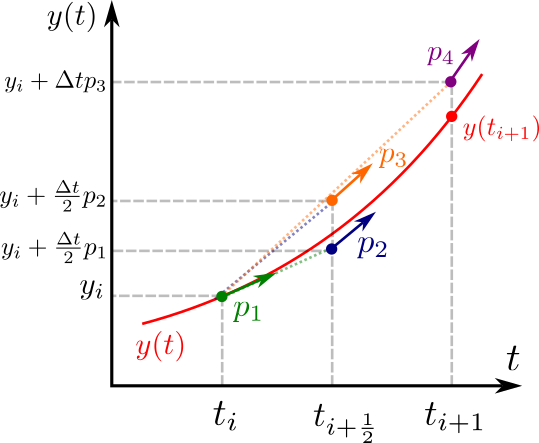

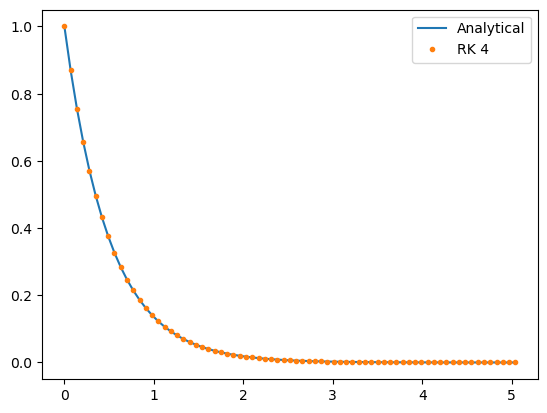

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

alpha = 2.
f = lambda x : -alpha*x 

tf = 5
Delta_t = 0.07

time = np.arange(0., tf, Delta_t)

y0 = 1

y_list = list()
time_list = list()

y_list.append(y0)
time_list.append(0)

for i in time:
    yn = y_list[-1]
    tn = time_list[-1]
    
    k1 = Delta_t*f(yn)
    k2 = Delta_t*f(yn + k1/2.)
    k3 = Delta_t*f(yn + k2/2.)
    k4 = Delta_t*f(yn + k3)
    
    y_np1 = yn + (k1 + 2.*k2 + 2.*k3 + k4)/6.
    t_np1 = tn + Delta_t
    
    time_list.append(t_np1)
    y_list.append(y_np1)

time_list = np.array(time_list)
y_list = np.array(y_list)

plt.plot(time_list, np.exp(-alpha*time_list), label="Analytical")
plt.plot(time_list, y_list,"o", ms=3.0, label="RK 4")

plt.legend()

## Conclusion

Nous avons abordé ici la question des équations différentielles ordinaires et de leur résolution numérique. Il s'agit alors d'approcher la solution à l'aide de différents schémas. La méthode la plus simple est d'utiliser une méthode des rectangles pour aboutir au schéma d'Euler. On différenciera un schéma explicite, direct dans sa formulation mais stable sous condition et un schéma implicite, qui nécessitera une étape d'inversion mais qui sera inconditionnellement stable. La notion implicite/explicite ne se limite pas aux schémas d'Euler et des méthodes plus précises peuvent être employées. C'est le cas des méthodes de Runge-Kutta, et qui seront relativement peu coûteuses et généralement à privilégier dans le cas d'une intégration explicite.